# **Necessary Imports**

In [4]:
# Import required libraries
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

# Tables

## 1. Patients Table

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| PatientID    | INTEGER| PK      | Unique identifier table1                 |
| firstname    | TEXT   |         | patient name                             |
| lastname    | TEXT   |         | patient lastname                             |
| email    | TEXT   |         | patient email                             |
| InvoiceID    | TEXT   |         | Unique identifier for each patient line |
| Items    | TEXT   |         |   Specifies what the operation is  |
| Amount    | INTEGER   |         | indicates the cost of the operation   |



## 2. Doctors Table

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| DoctortID    | INTEGER| PK      | Unique identifier table1                 |
| DoctorName    | TEXT   |         | doctor name                             |
| Specialization    | TEXT   |         | indicates the doctor's area of expertise |
| DoctorContact | TEXT   |         | doctor email                             |



## 3. Appointments Table

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| AppointmentID | INTEGER| PK      | Unique identifier table1                 |
| PatientID   | INTEGER   |   FK      |  Identifier for the patientID of the appointment |
| DoctortID | INTEGER   |    FK     |   Identifier for the doctorID of the appointment |
| Date   | TEXT   |         |  date of appointment |
| Time  | TEXT   |         | Appointment time |
| ProcedureID  | INTEGER   |         |   Identifier for the procedure of the appointment  |
| ProcedureName    | TEXT   |         | Indicates what medical procedure was performed  |


In [16]:
# Reads "Appointments_procedures.csv" and creates a DataFrame named appointments_df
appointments_df = pd.read_csv("Data/Appointments_procedures.csv")

# Reads "Patient_billing.csv" and creates a DataFrame named patient_billing_df
patient_billing_df = pd.read_csv("Data/Patient_billing.csv")

# Reads "Doctors.csv" and creates a DataFrame named doctors_df
doctors_df = pd.read_csv("Data/Doctors.csv")

In [17]:
# Establishes a connection to the 'medical_records.db' SQLite database
conn = sql.connect('medical_records.db')

In [18]:
cursor = conn.cursor()

In [19]:
cursor.execute('DROP TABLE IF EXISTS PATIENTS')
conn.commit()

cursor.execute('DROP TABLE IF EXISTS DOCTORS')
conn.commit()

cursor.execute('DROP TABLE IF EXISTS APPOINTMENTS')
conn.commit()

In [20]:
#Create a table named PATIENTS if it does not already exist
cursor.execute(''' 
CREATE TABLE IF NOT EXISTS PATIENTS ( 
    PatientID INTEGER PRIMARY KEY,
    firstname TEXT,
    lastname TEXT,
    email TEXT,
    InvoiceID TEXT,
    Items TEXT,
    Amount INTEGER
)
''') 

In [21]:
#Create a table named DOCTORS if it does not already exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS DOCTORS ( 
    DoctorID INTEGER PRIMARY KEY,
    DoctorName TEXT,
    Specialization TEXT,
    DoctorContact TEXT
)
''') 

In [22]:
#Create a table named APPOINTMENTS if it does not already exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS APPOINTMENTS ( 
    AppointmentID INTEGER PRIMARY KEY,
    Date TEXT,
    Time TEXT,
    PatientID INTEGER,
    DoctorID INTEGER,
    ProcedureID INTEGER,
    ProcedureName TEXT,
    FOREIGN KEY (PatientID) REFERENCES PATIENTS (PatientID),
    FOREIGN KEY (DoctorID) REFERENCES DOCTORS (DoctorID)
)
''') 

In [23]:
#Since PatientID is the primary key, it should be unique, so remove any duplicates.
patient_billing_df = patient_billing_df.drop_duplicates(subset='PatientID')

# Inserts the DataFrame 'patient_billing_df' into the 'PATIENTS' table, appending the data
patient_billing_df.to_sql('PATIENTS', conn, if_exists='append', index=False)

409

In [24]:
#Since DoctorID is the primary key, it should be unique, so remove any duplicates.
doctors_df = doctors_df.drop_duplicates(subset='DoctorID')

# Inserts the DataFrame 'doctors_df' into the 'DOCTORS' table, appending the data. Index is not included.
doctors_df.to_sql('DOCTORS', conn, if_exists='append', index=False)

600

In [25]:
#Since AppointmentID is the primary key, it should be unique, so remove any duplicates.
appointments_df = appointments_df.drop_duplicates(subset='AppointmentID')

# Inserts the DataFrame 'appointments_df' into the 'APPOINTMENTS' table, appending the data. Index is not included.
appointments_df.to_sql('APPOINTMENTS', conn, if_exists='append', index=False)

304

# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [26]:
cursor.execute('''SELECT APPOINTMENTS.DoctorID, DoctorName, COUNT(*) AS total_appointments
FROM APPOINTMENTS, DOCTORS
WHERE APPOINTMENTS.DoctorID = DOCTORS.DoctorID
GROUP BY APPOINTMENTS.DoctorID
ORDER BY total_appointments DESC
LIMIT 5
''')

result = cursor.fetchall() # Fetches all the results from the executed query
columns = ['DoctorID', 'DoctorName','total_appointments']
df_result = pd.DataFrame(result, columns = columns)
df_result

,DoctorID,DoctorName,total_appointments
0,820,Christal,3
1,800,Hermione,3
2,637,Lorenza,3
3,542,Sandie,3
4,527,Cristabel,3


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [27]:
cursor.execute('''SELECT PatientID, firstname, lastname, SUM(Amount) AS total_billed_amount
FROM PATIENTS
GROUP BY PatientID 
ORDER BY total_billed_amount DESC
''')

result = cursor.fetchall() # Fetches all the results from the executed query
columns = ['PatientID', 'firstname','lastname', 'total_billed_amount']
df_result = pd.DataFrame(result, columns = columns)
df_result

,PatientID,firstname,lastname,total_billed_amount
0,410,Ilse,Felecia,998106
1,888,Reeba,Romelda,996843
2,241,Lynnea,Arquit,996207
3,377,Fred,Stover,995778
4,291,Roz,Oster,991090
...,...,...,...,...
404,298,Chere,Dom,20564
405,921,Gavrielle,Kellby,16767
406,827,Mureil,Oriana,16567
407,371,Zaria,Durware,16114


# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [28]:
# your code here

In [29]:
cursor.execute('''SELECT APPOINTMENTS.DoctorID,DoctorName, ProcedureName, COUNT(*) AS procedure_count
FROM APPOINTMENTS, DOCTORS
WHERE APPOINTMENTS.DoctorID = DOCTORS.DoctorID
GROUP BY APPOINTMENTS.DoctorID, ProcedureName 

''')

result = cursor.fetchall() # Fetches all the results from the executed query
columns = ['DoctorID','DoctorName','ProcedureName','procedure_count']
df_result = pd.DataFrame(result, columns = columns)
df_result

,DoctorID,DoctorName,ProcedureName,procedure_count
0,101,Mireielle,General surgery,1
1,117,Karena,Anesthetic care during childbirth,1
2,117,Karena,Angioplasty and stent placement,1
3,117,Karena,Orthopedic surgery,1
4,119,Flory,Symptom management for end-of-life care,1
...,...,...,...,...
198,975,Hettie,LASIK eye surgery,1
199,984,Dacia,Allergy testing,1
200,993,Sadie,Epidural anesthesia for pain management,1
201,997,Georgina,Hormone replacement therapy,1


# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [30]:
cursor.execute('''SELECT DOCTORS.DoctorID, DoctorName, SUM(Amount) AS total_revenue
FROM DOCTORS, APPOINTMENTS, PATIENTS
WHERE DOCTORS.DoctorID = APPOINTMENTS.DoctorID AND PATIENTS.PatientID = APPOINTMENTS.PatientID
GROUP BY APPOINTMENTS.DoctorID
''')

result = cursor.fetchall() # Fetches all the results from the executed query
columns = ['DoctorID','DoctorName','total_revenue']
df_result = pd.DataFrame(result, columns = columns)
df_result

,DoctorID,DoctorName,total_revenue
0,101,Mireielle,545986
1,117,Karena,153320
2,120,Lilith,144746
3,129,Aurelie,720623
4,155,Alleen,114657
...,...,...,...
86,957,Sissy,87017
87,959,Sharai,608597
88,965,Flory,267999
89,971,Moyna,450981


# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [32]:
cursor.execute('''SELECT APPOINTMENTS.PatientID, firstname, lastname, COUNT(*) AS appointment_count
FROM APPOINTMENTS, PATIENTS
WHERE APPOINTMENTS.PatientID = PATIENTS.PatientID
GROUP BY APPOINTMENTS.PatientID
HAVING appointment_count > 1
ORDER BY appointment_count DESC
''')

result = cursor.fetchall() # Fetches all the results from the executed query
columns = ['PatientID','firstname','lastname', 'appointment_count']
df_result = pd.DataFrame(result, columns = columns)
df_result

,PatientID,firstname,lastname,appointment_count
0,368,Stephanie,Agle,4
1,717,Tybie,Latini,3
2,977,Carree,Bach,2
3,961,Ruthe,Garbe,2
4,934,Sam,Cookie,2
5,917,Harrietta,Maisey,2
6,870,Carolina,Carbo,2
7,817,Trixi,Skurnik,2
8,747,Lila,Rhu,2
9,696,Grier,Noam,2


# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

In [33]:
df = pd.read_csv('Data/Suicides.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [34]:
# Creates a pivot table to show average suicides per 100k population by country and year
pivot_table = pd.pivot_table(df, values='suicides/100k pop', index='country', columns='year', aggfunc='mean')
pivot_table

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,2.654167,2.705000,2.783333,NaN,NaN,1.500000,2.713333,2.681667,...,5.487500,5.920833,0.000000,3.471667,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,1.436667,0.000000,0.000000,1.250000,0.000000,...,0.665000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.301667,NaN
Argentina,11.205833,12.741667,12.081667,12.186667,11.577500,11.241667,9.936667,10.571667,11.230833,10.170833,...,9.862500,9.842500,8.943333,9.270000,8.822500,9.985000,8.618333,9.279167,9.344167,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,3.426667,3.822500,3.405000,4.254167,5.560833,...,3.251667,2.929167,2.808333,3.367500,2.748333,3.047500,3.123333,3.084167,3.773333,4.056
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.682500,3.453333,3.519167,4.887500,7.785000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.332500,0.988333,0.977500,1.892500,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,9.704167,9.334167,8.650833,9.545833,8.265833,8.611667,8.233333,8.229167,8.070833,7.896667,...,6.243333,6.725833,6.500000,6.450833,6.524167,6.622500,7.076667,6.994167,7.228333,NaN
United States,15.393333,15.970833,15.971667,15.642500,15.203333,15.650000,15.314167,14.814167,14.926667,14.669167,...,12.426667,12.770000,12.849167,13.240833,13.530000,13.761667,13.889167,14.277500,14.617500,NaN


In [35]:
pivot_table.stack().idxmax()

('Lithuania', np.int64(1995))

In [36]:
pivot_table.max().max()

np.float64(53.275)

The highest average suicide rate over the years was recorded in **Lithuania** in **1995**, with an average of **53.275**.

In [37]:
pivot_table.stack().idxmin()

('Albania', np.int64(2005))

In [38]:
pivot_table.min().min()

np.float64(0.0)

The lowest average suicide rate over the years was recorded in **Albania** in **2005**, with an average of **0.0**.

# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

In [39]:
# Prints the total number of missing values in the 'suicides/100k pop' column
print(df['suicides/100k pop'].isna().sum())


0


In [40]:
# Calculate the maximum value for the histogram range.
print(df['suicides/100k pop'].max())


224.97


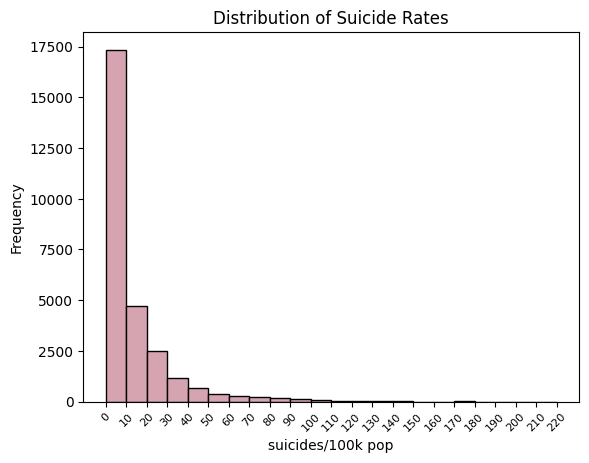

In [41]:
plt.hist(df['suicides/100k pop'], bins=np.arange(0, 225, 10), color='#D6A3B1', edgecolor='black', align='mid')
plt.xticks(np.arange(0, 225, 10), rotation=45, fontsize=8) 
plt.title('Distribution of Suicide Rates')
plt.xlabel('suicides/100k pop')
plt.ylabel('Frequency')
plt.show()


The most common suicide rate falls within the **0-10** range, indicating that most countries have suicide rates within this interval. Upon examining the graph, it is observed that as suicide rates increase, the frequency decreases. Although the maximum value is **224.97**, there are very few countries with suicide rates of **50** and above when the graph is examined.

# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

In [42]:
df['year'].max()

np.int64(2016)

In [43]:
year_filtered_data = df.loc[df['year'] == 2016].copy()
year_filtered_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
25307,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,"411,755,164,833",6713,Silent
25308,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,"411,755,164,833",6713,Boomers
25309,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,"411,755,164,833",6713,Generation X
25310,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,"411,755,164,833",6713,Millenials


In [44]:
year_filtered_data['total_suicides'] = year_filtered_data['population'] * year_filtered_data['suicides/100k pop'] / 100000
new_data = year_filtered_data.groupby('sex')['total_suicides'].sum()
new_data

sex
female     3504.395016
male      12098.907733
Name: total_suicides, dtype: float64

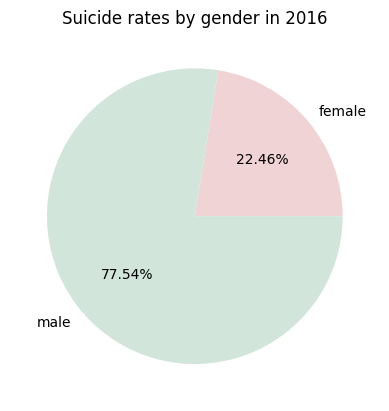

In [45]:
colors = ['#F0D3D5', '#D1E5DB']
plt.pie(new_data, labels = new_data.index, colors = colors, autopct='%1.2f%%')
plt.title('Suicide rates by gender in 2016')
plt.show()

Upon examining the pie chart, it has been determined that in **2016**, **77.54%** of suicide cases were male, while **22.46%** were female. These figures reveal that the suicide rates among men are significantly higher than those among women.

# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

Text(0, 0.5, 'suicides/100k pop')

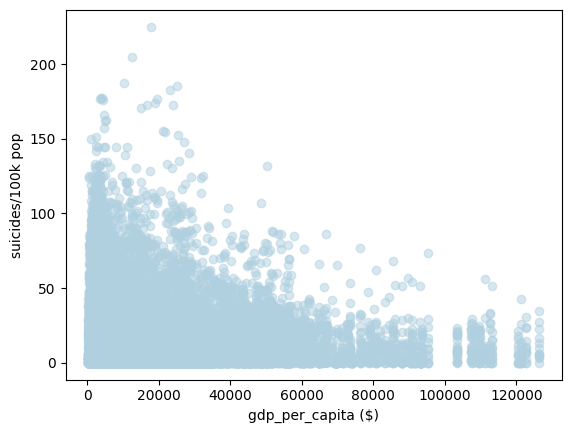

In [46]:
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'], color = '#B0D0E0', alpha = 0.5)
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicides/100k pop')

Upon examining the scatter plot, a correlation has been found between a **country's wealth (GDP per capita)** and **its suicide rates**. It has been determined that the highest suicide rates occur in the range of GDP per capita from 0 to **20000**. As the GDP per capita increases, the values of suicide rates tend to decrease.

# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

In [47]:
df['total_suicides'] = df['population'] * df['suicides/100k pop'] / 100000
new_data = df.groupby('country')['total_suicides'].sum() / df.groupby('country')['population'].sum() * 100000
sorted_new_data = new_data.sort_values(ascending=False).head(10)
sorted_new_data

country
Lithuania             41.182449
Russian Federation    32.777075
Sri Lanka             30.484266
Belarus               30.344993
Hungary               29.717299
Latvia                28.471236
Kazakhstan            26.898588
Slovenia              26.360287
Estonia               25.964816
Ukraine               24.870507
dtype: float64

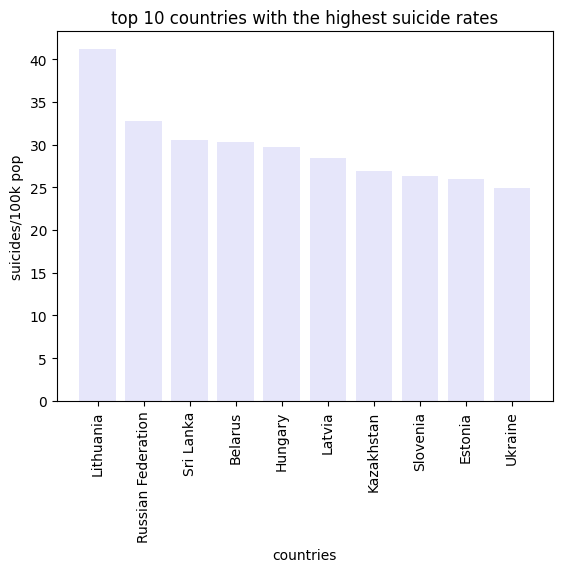

In [48]:
plt.bar(sorted_new_data.index, sorted_new_data, color = '#E6E6FA')
plt.xticks(rotation=90, fontsize=10) 
plt.title('top 10 countries with the highest suicide rates')
plt.xlabel('countries')
plt.ylabel('suicides/100k pop')
plt.show()

"When the graph is examined, it is determined that **Lithuania** has the highest suicide rate with a rate of **over 40 suicides per 100k population**. The remaining nine countries with the highest suicide rates have relatively closer values to each other, and these countries are identified as **Russian Federation, Sri Lanka, Belarus, Hungary, Latvia, Kazakhstan, Slovenia, Estonia**, and **Ukraine**."